<a href="https://colab.research.google.com/github/Suriya-002/Tensorflow_Developer/blob/main/NLP_in_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [156]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-87e42056-d054-07b2-674e-c61d88bf1f74)


In [157]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-01-16 18:00:40--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-01-16 18:00:40 (81.9 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [158]:
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

In [159]:
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"


--2023-01-16 18:00:41--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.153.128, 74.125.143.128, 108.177.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.153.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip.1’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.003s  

2023-01-16 18:00:41 (171 MB/s) - ‘nlp_getting_started.zip.1’ saved [607343/607343]



In [160]:
unzip_data("nlp_getting_started.zip")

In [161]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv('test.csv')

In [163]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [164]:
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [165]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [166]:
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [167]:
print(f"Total training samples: {len(train_df)}")
print(f"Total test samples: {len(test_df)}")
print(f"Total samples: {len(train_df) + len(test_df)}")

Total training samples: 7613
Total test samples: 3263
Total samples: 10876


In [168]:
import random

In [169]:
random_index = random.randint(0, len(train_df)-5)
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 1 (real disaster)
Text:
'Fatal crash reported on Johns Island' http://t.co/d2i9bL89Zo

---

Target: 1 (real disaster)
Text:
Flattened thee striker

---

Target: 1 (real disaster)
Text:
Strikers in Phalaborwa striking over the CHINESE taking their jobs. Strikers burning buildings attacking cars 2... http://t.co/08LnGClZsj

---

Target: 1 (real disaster)
Text:
#News: 'Many deaths' in shipwreck: Rescuers are trying to save hundreds of migrants after the... http://t.co/tX51oYbrN6 via @TheNewsHype

---

Target: 0 (not real disaster)
Text:
matako_3: Breaking news! Unconfirmed! I just heard a loud bang nearby. in what appears to be a blast of wind from my neighbour's ass.

---



In [170]:
from sklearn.model_selection import train_test_split

In [171]:
train_sentences, val_sentences, train_labels, val_labels= train_test_split(train_df_shuffled["text"].to_numpy(), train_df_shuffled['target'].to_numpy(), test_size=0.1, random_state=42 )

In [172]:
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [173]:
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

In [174]:
import tensorflow as tf

In [175]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [176]:
text_vectorizer = TextVectorization(max_tokens = None,
                                    standardize = "lower_and_strip_punctuation", split="whitespace", output_mode = "int",
                                    output_sequence_length = None)

In [177]:
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [178]:
max_vocab_length = 10000
max_length = 15

text_vectorizer = TextVectorization(max_tokens = max_vocab_length, output_mode="int", 
                                    output_sequence_length=max_length)

In [179]:
text_vectorizer.adapt(train_sentences)

In [180]:
sample = "There's a flood in my street!"
text_vectorizer([sample])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [181]:
random_sentence = random.choice(train_sentences)
print(f"Original sentence : \n {random_sentence}\n\nVectorized version:")
text_vectorizer([random_sentence])

Original sentence : 
 One Direction Is my pick for http://t.co/q2eBlOKeVE Fan Army #Directioners http://t.co/eNCmhz6y34 x1386

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  61, 1143,    9,   13,  767,   10, 2091,  627,  164, 1689, 2092,
        6622,    0,    0,    0]])>

In [182]:
words_in_vocab = text_vectorizer.get_vocabulary()

top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]
print(f"Number of words in the vocabulary : {len(words_in_vocab)}")
print(f"Top 5 words in the vocabulary : {top_5_words}")
print(f"Least used words in the vocabulary : {bottom_5_words}")

Number of words in the vocabulary : 10000
Top 5 words in the vocabulary : ['', '[UNK]', 'the', 'a', 'in']
Least used words in the vocabulary : ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


In [183]:
from tensorflow.keras import layers

In [184]:
embedding = layers.Embedding(input_dim = max_vocab_length,
                             output_dim = 128,
                             embeddings_initializer="uniform",
                             input_length = max_length, name="Embedding_Layer")

In [185]:
embedding

In [186]:
random_sentence = random.choice(train_sentences)
print(f"The original sentence is : \n {random_sentence}\n")
print("The embedded sentence is :\n")
sample_embedded = embedding(text_vectorizer(random_sentence))
sample_embedded

The original sentence is : 
 If there's a chance will get a gander of the sinking ship that is #TNA too. Can't help but appease my morbid curiosity. #DestinationIMPACT

The embedded sentence is :



<tf.Tensor: shape=(15, 128), dtype=float32, numpy=
array([[ 0.04068298, -0.04539561, -0.02358577, ..., -0.03919747,
        -0.04445482, -0.0192096 ],
       [ 0.01745972,  0.03410616,  0.04145113, ...,  0.00077625,
         0.00574542, -0.01095512],
       [ 0.02403459,  0.0018812 , -0.03994747, ..., -0.04946786,
         0.01219199,  0.03246501],
       ...,
       [ 0.00526184,  0.04698444, -0.02605493, ..., -0.00095939,
        -0.01503006, -0.04563145],
       [ 0.02375812, -0.03981519,  0.03777833, ...,  0.03600413,
         0.01043186, -0.00536327],
       [ 0.00637125,  0.039843  , -0.00796714, ..., -0.04374263,
         0.02898781,  0.04396197]], dtype=float32)>

In [187]:
sample_embedded[0][0]

<tf.Tensor: shape=(), dtype=float32, numpy=0.040682975>

In [188]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [189]:
from sklearn.pipeline import Pipeline

In [190]:
model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])

In [191]:
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [192]:
baseline_score = model_0.score(val_sentences, val_labels)

In [193]:
baseline_score

0.7926509186351706

In [194]:
pred = model_0.predict(val_sentences)

In [195]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [196]:
def evaluationMetrics(y_true, pred):
  accuracy = accuracy_score(y_true, pred)
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, pred, average="weighted")


  model_results = {
      "accuracy" : accuracy,
      "precision" : model_precision,
      "recall" : model_recall,
      "f1" : model_f1
  }

  return model_results

In [197]:
model_0_results = evaluationMetrics(val_labels, pred)

In [198]:
from helper_functions import create_tensorboard_callback

In [199]:
SAVE_DIR = "model_logs"

In [200]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)

In [201]:
model_1 = tf.keras.Model(inputs, outputs, name="Model_1")

In [202]:
model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

In [203]:
model_1.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_3 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 Embedding_Layer (Embedding)  (None, 15, 128)          1280000   
                                                                 
 global_average_pooling1d_1   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
Non-tra

In [204]:
model_1_history = model_1.fit(train_sentences, train_labels, validation_data=(val_sentences, val_labels),
                              epochs=5, callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, 
                                                                     experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20230116-180042
Epoch 1/5
215/215 [==============================] - 2s 6ms/step - loss: 0.6117 - accuracy: 0.6914 - val_loss: 0.5373 - val_accuracy: 0.7533
Epoch 2/5
215/215 [==============================] - 1s 5ms/step - loss: 0.4422 - accuracy: 0.8180 - val_loss: 0.4698 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 1s 4ms/step - loss: 0.3471 - accuracy: 0.8613 - val_loss: 0.4595 - val_accuracy: 0.7900
Epoch 4/5
215/215 [==============================] - 1s 4ms/step - loss: 0.2856 - accuracy: 0.8917 - val_loss: 0.4645 - val_accuracy: 0.7887
Epoch 5/5
215/215 [==============================] - 1s 4ms/step - loss: 0.2387 - accuracy: 0.9124 - val_loss: 0.4770 - val_accuracy: 0.7861


In [205]:
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4770 - accuracy: 0.7861


[0.4769516885280609, 0.7860892415046692]

In [206]:
embedding.weights

[<tf.Variable 'Embedding_Layer/embeddings:0' shape=(10000, 128) dtype=float32, numpy=
 array([[ 0.00394358,  0.0344306 , -0.06971712, ...,  0.05272312,
          0.0577228 ,  0.01435335],
        [ 0.03459619, -0.02999217,  0.01951519, ...,  0.03944814,
         -0.00262453,  0.03874953],
        [-0.05846011, -0.00114103,  0.0245656 , ...,  0.03843647,
          0.01707072,  0.05688152],
        ...,
        [-0.01260813, -0.03457575,  0.01145655, ..., -0.01786678,
          0.02948416,  0.01827223],
        [-0.04080625,  0.04320076, -0.02239124, ...,  0.00555468,
          0.00646562,  0.00704075],
        [-0.0474162 ,  0.0398641 , -0.03604982, ...,  0.09108891,
          0.07447815,  0.05852212]], dtype=float32)>]

In [207]:
model_1_pred = model_1.predict(val_sentences)
model_1_pred = tf.squeeze(tf.round(model_1_pred))

24/24 [==============================] - 0s 2ms/step


In [208]:
model_1_results = evaluationMetrics(val_labels, model_1_pred)

In [209]:
model_1_results

{'accuracy': 0.7860892388451444,
 'precision': 0.7903277546022673,
 'recall': 0.7860892388451444,
 'f1': 0.7832971347503846}

In [210]:
def compare_baseline_to_new_results(baseline_results, new_model_results):
  for key, value in baseline_results.items():
    print(f"Baseline {key}: {value:.2f}, New {key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key]-value:.2f}")

compare_baseline_to_new_results(baseline_results=model_0_results, 
                                new_model_results=model_1_results)

Baseline accuracy: 0.79, New accuracy: 0.79, Difference: -0.01
Baseline precision: 0.81, New precision: 0.79, Difference: -0.02
Baseline recall: 0.79, New recall: 0.79, Difference: -0.01
Baseline f1: 0.79, New f1: 0.78, Difference: -0.00


In [211]:
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [212]:
model_1.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_3 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 Embedding_Layer (Embedding)  (None, 15, 128)          1280000   
                                                                 
 global_average_pooling1d_1   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
Non-tra

In [213]:
embed_weights = model_1.get_layer("Embedding_Layer").get_weights()[0]
print(embed_weights.shape)

(10000, 128)


In [214]:
tf.random.set_seed(42)

from tensorflow.keras import layers

model_2_embedding = layers.Embedding(input_dim = max_vocab_length, output_dim = 128,
                                     embeddings_initializer = 'uniform', input_length = max_length, name="embedding_2")

inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = model_2_embedding(x)
x = layers.LSTM(64)(x)
print(x.shape)
outputs = layers.Dense(1, activation='sigmoid')(x)

(None, 64)


In [215]:
model_2 = tf.keras.Model(inputs, outputs, name='model_2')

In [216]:
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics = 'accuracy')

In [217]:
model_2_history = model_2.fit(train_sentences, train_labels, epochs=5, callbacks =[create_tensorboard_callback(SAVE_DIR, 
                                                                     "LSTM")], validation_data = (val_sentences, val_labels))

Saving TensorBoard log files to: model_logs/LSTM/20230116-180049
Epoch 1/5
215/215 [==============================] - 4s 9ms/step - loss: 0.5100 - accuracy: 0.7416 - val_loss: 0.4566 - val_accuracy: 0.7822
Epoch 2/5
215/215 [==============================] - 1s 7ms/step - loss: 0.3176 - accuracy: 0.8717 - val_loss: 0.5138 - val_accuracy: 0.7756
Epoch 3/5
215/215 [==============================] - 1s 7ms/step - loss: 0.2201 - accuracy: 0.9152 - val_loss: 0.5858 - val_accuracy: 0.7677
Epoch 4/5
215/215 [==============================] - 1s 7ms/step - loss: 0.1556 - accuracy: 0.9428 - val_loss: 0.6041 - val_accuracy: 0.7743
Epoch 5/5
215/215 [==============================] - 1s 7ms/step - loss: 0.1076 - accuracy: 0.9594 - val_loss: 0.8746 - val_accuracy: 0.7507


In [218]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_3 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_2 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
_________________________________________________

In [219]:
model_2.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 4ms/step - loss: 0.8746 - accuracy: 0.7507


[0.8746163845062256, 0.7506561875343323]

In [220]:
model_2_pred = model_2.predict(val_sentences)

24/24 [==============================] - 0s 3ms/step


In [221]:
model_2_pred = tf.squeeze(tf.round(model_2_pred))

In [222]:
model_2_results = evaluationMetrics(val_labels, model_2_pred)

In [223]:
model_2_results

{'accuracy': 0.7506561679790026,
 'precision': 0.7510077975908164,
 'recall': 0.7506561679790026,
 'f1': 0.7489268622514025}

In [224]:
compare_baseline_to_new_results(model_0_results, model_2_results)

Baseline accuracy: 0.79, New accuracy: 0.75, Difference: -0.04
Baseline precision: 0.81, New precision: 0.75, Difference: -0.06
Baseline recall: 0.79, New recall: 0.75, Difference: -0.04
Baseline f1: 0.79, New f1: 0.75, Difference: -0.04


In [225]:

tf.random.set_seed(42)
from tensorflow.keras import layers
model_3_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_3")


inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_3_embedding(x)
x = layers.GRU(64)(x) 
outputs = layers.Dense(1, activation="sigmoid")(x)

In [226]:
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [227]:
model_3.compile(loss='binary_crossentropy', metrics = 'accuracy', optimizer='adam')

In [228]:
model_3.history = model_3.fit(train_sentences, train_labels, validation_data = (val_sentences, val_labels), epochs = 5, 
                              callbacks =[create_tensorboard_callback(SAVE_DIR, "GRU")] )

Saving TensorBoard log files to: model_logs/GRU/20230116-180059
Epoch 1/5
215/215 [==============================] - 4s 13ms/step - loss: 0.5242 - accuracy: 0.7314 - val_loss: 0.4553 - val_accuracy: 0.7769
Epoch 2/5
215/215 [==============================] - 1s 7ms/step - loss: 0.3195 - accuracy: 0.8694 - val_loss: 0.4937 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 1s 6ms/step - loss: 0.2197 - accuracy: 0.9181 - val_loss: 0.5607 - val_accuracy: 0.7743
Epoch 4/5
215/215 [==============================] - 1s 6ms/step - loss: 0.1599 - accuracy: 0.9441 - val_loss: 0.6220 - val_accuracy: 0.7782
Epoch 5/5
215/215 [==============================] - 2s 7ms/step - loss: 0.1221 - accuracy: 0.9584 - val_loss: 0.6205 - val_accuracy: 0.7677


In [229]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_3 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 gru_1 (GRU)                 (None, 64)                37248     
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

In [230]:
model_3.pred = model_3.predict(val_sentences)

24/24 [==============================] - 0s 3ms/step


In [231]:
model_3.pred = tf.squeeze(tf.round(model_3.pred))

In [232]:
model_3_results = evaluationMetrics(val_labels , model_3.pred)

In [233]:
model_3_results

{'accuracy': 0.7677165354330708,
 'precision': 0.7675450859410361,
 'recall': 0.7677165354330708,
 'f1': 0.7667932666650168}

In [234]:
compare_baseline_to_new_results(model_0_results, model_3_results)

Baseline accuracy: 0.79, New accuracy: 0.77, Difference: -0.02
Baseline precision: 0.81, New precision: 0.77, Difference: -0.04
Baseline recall: 0.79, New recall: 0.77, Difference: -0.02
Baseline f1: 0.79, New f1: 0.77, Difference: -0.02


In [235]:
tf.random.set_seed(42)

from tensorflow.keras import layers

model_4_embeddings = layers. Embedding(input_dim=max_vocab_length, output_dim=128,
                                       input_length = max_length, name="model_4_embeddings")

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_4_embeddings(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_Bidirectional")

In [236]:
model_4.compile(loss='binary_crossentropy', metrics='accuracy', optimizer = 'adam')

In [237]:
model_4_history = model_4.fit(train_sentences, train_labels, validation_data=(val_sentences, val_labels), epochs=5,
                              callbacks = [create_tensorboard_callback(SAVE_DIR, "bidirectional_RNN")])

Saving TensorBoard log files to: model_logs/bidirectional_RNN/20230116-180111
Epoch 1/5
215/215 [==============================] - 6s 12ms/step - loss: 0.5093 - accuracy: 0.7481 - val_loss: 0.4606 - val_accuracy: 0.7795
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3135 - accuracy: 0.8708 - val_loss: 0.5144 - val_accuracy: 0.7690
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.2150 - accuracy: 0.9178 - val_loss: 0.5626 - val_accuracy: 0.7677
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1523 - accuracy: 0.9469 - val_loss: 0.6365 - val_accuracy: 0.7769
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1083 - accuracy: 0.9639 - val_loss: 0.6509 - val_accuracy: 0.7664


In [238]:
model_4.summary()

Model: "model_4_Bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_3 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 model_4_embeddings (Embeddi  (None, 15, 128)          1280000   
 ng)                                                             
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_12 (Dense)            (None, 1)                 129       
                                             

In [239]:
model_4_pred = model_4.predict(val_sentences)

24/24 [==============================] - 1s 4ms/step


In [240]:
model_4_pred = tf.squeeze(tf.round(model_4_pred))

In [241]:
model_4_results = evaluationMetrics(val_labels, model_4_pred)

In [242]:
model_4_results

{'accuracy': 0.7664041994750657,
 'precision': 0.7665895370389821,
 'recall': 0.7664041994750657,
 'f1': 0.7651213533864446}

In [243]:
compare_baseline_to_new_results(model_0_results, model_4_results)

Baseline accuracy: 0.79, New accuracy: 0.77, Difference: -0.03
Baseline precision: 0.81, New precision: 0.77, Difference: -0.04
Baseline recall: 0.79, New recall: 0.77, Difference: -0.03
Baseline f1: 0.79, New f1: 0.77, Difference: -0.02


In [244]:
embedding_test = embedding(text_vectorizer(["this is a test sentence"])) 
conv_1d = layers.Conv1D(filters=32, kernel_size=5, activation="relu") 
conv_1d_output = conv_1d(embedding_test) 
max_pool = layers.GlobalMaxPool1D() 
max_pool_output = max_pool(conv_1d_output) 
embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [245]:
tf.random.set_seed(42)

from tensorflow.keras import layers

model_5_embedding = layers.Embedding(input_dim=max_vocab_length, output_dim=128, input_length = max_length, 
                                     name="embedding_4_layer", embeddings_initializer ='uniform')

inputs = layers.Input(shape=(1,), dtype='string', name='input_layer')
x = text_vectorizer(inputs)
x  = model_5_embedding(x)
x = layers.Conv1D(filters=32,kernel_size=5, activation='relu')(x)
x = layers.GlobalMaxPool1D()(x)

outputs = layers.Dense(1, activation='sigmoid')(x)

model_5 = tf.keras.Model(inputs, outputs, name="Model_5")

In [246]:
model_5.compile(loss='binary_crossentropy', metrics='accuracy', optimizer='adam')

In [247]:
model_5_history = model_5.fit(train_sentences, train_labels, validation_data=(val_sentences, val_labels), epochs=5,
                              callbacks = [create_tensorboard_callback(SAVE_DIR, 
                                                                     "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20230116-180135
Epoch 1/5
215/215 [==============================] - 2s 6ms/step - loss: 0.5652 - accuracy: 0.7141 - val_loss: 0.4733 - val_accuracy: 0.7795
Epoch 2/5
215/215 [==============================] - 1s 5ms/step - loss: 0.3380 - accuracy: 0.8615 - val_loss: 0.4758 - val_accuracy: 0.7730
Epoch 3/5
215/215 [==============================] - 1s 5ms/step - loss: 0.2070 - accuracy: 0.9234 - val_loss: 0.5457 - val_accuracy: 0.7730
Epoch 4/5
215/215 [==============================] - 1s 5ms/step - loss: 0.1314 - accuracy: 0.9578 - val_loss: 0.6163 - val_accuracy: 0.7730
Epoch 5/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0933 - accuracy: 0.9691 - val_loss: 0.6779 - val_accuracy: 0.7782


In [248]:
model_5.summary()

Model: "Model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 1)]               0         
                                                                 
 text_vectorization_3 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_4_layer (Embeddin  (None, 15, 128)          1280000   
 g)                                                              
                                                                 
 conv1d_3 (Conv1D)           (None, 11, 32)            20512     
                                                                 
 global_max_pooling1d_3 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                           

In [249]:
model_5_pred = model_5.predict(val_sentences)

24/24 [==============================] - 0s 2ms/step


In [250]:
model_5_pred = tf.squeeze(tf.round(model_5_pred))

In [251]:
model_5_results = evaluationMetrics(val_labels, model_5_pred)

In [252]:
model_5_results

{'accuracy': 0.7782152230971129,
 'precision': 0.7807522349051432,
 'recall': 0.7782152230971129,
 'f1': 0.7758810170952618}

In [253]:
compare_baseline_to_new_results(model_0_results, model_5_results)

Baseline accuracy: 0.79, New accuracy: 0.78, Difference: -0.01
Baseline precision: 0.81, New precision: 0.78, Difference: -0.03
Baseline recall: 0.79, New recall: 0.78, Difference: -0.01
Baseline f1: 0.79, New f1: 0.78, Difference: -0.01


In [254]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [255]:
sample_sentence = "There's a flood in the apartment"

embed_samples = embed([sample_sentence,
                      "When you call the universal sentence encoder on a sentence, it turns it into numbers."])

print(embed_samples[0][:50])

tf.Tensor(
[-0.05481583  0.05924159  0.04751929 -0.02222712  0.05618287  0.08045242
  0.05017881  0.0461718  -0.0371818   0.012196    0.03157391 -0.00276357
  0.00257801  0.05495034  0.08029597  0.00853925  0.00220774 -0.01901023
 -0.00627511 -0.05941811 -0.04307199  0.06080053  0.07903369  0.05777168
 -0.00870997  0.02064303  0.04534869  0.01557915 -0.01274062 -0.05191291
 -0.05753746  0.02564017 -0.07279508 -0.03407111  0.0313523  -0.03945035
  0.00398642  0.03085339 -0.00027082 -0.06224486 -0.00024988  0.02328101
  0.03132417  0.048965   -0.09994178 -0.00104942  0.01143012  0.02858678
 -0.03003421  0.00808798], shape=(50,), dtype=float32)


In [256]:
embed_samples[0].shape

TensorShape([512])

In [257]:
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        trainable=False, name='USE', dtype=tf.string)

In [258]:
tf.random.set_seed(42)

from tensorflow.keras import layers

model_6 = tf.keras.Sequential([
    sentence_encoder_layer, 
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
], name='model_6_USE')

model_6.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

In [259]:
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_14 (Dense)            (None, 64)                32832     
                                                                 
 dense_15 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [260]:
model_6_history = model_6.fit(train_sentences, train_labels, validation_data=(val_sentences, val_labels), epochs=5,
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20230116-180150
Epoch 1/5
215/215 [==============================] - 6s 15ms/step - loss: 0.5050 - accuracy: 0.7806 - val_loss: 0.4474 - val_accuracy: 0.7966
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.4143 - accuracy: 0.8149 - val_loss: 0.4355 - val_accuracy: 0.8123
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3992 - accuracy: 0.8222 - val_loss: 0.4311 - val_accuracy: 0.8110
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3914 - accuracy: 0.8253 - val_loss: 0.4264 - val_accuracy: 0.8136
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3846 - accuracy: 0.8304 - val_loss: 0.4285 - val_accuracy: 0.8176


In [261]:
model_6_pred = model_6.predict(val_sentences)

24/24 [==============================] - 1s 10ms/step


In [262]:
model_6_pred = tf.squeeze(tf.round(model_6_pred))

In [263]:
model_6_results = evaluationMetrics(val_labels, model_6_pred)

In [264]:
model_6_results

{'accuracy': 0.8175853018372703,
 'precision': 0.8206021490415145,
 'recall': 0.8175853018372703,
 'f1': 0.8158792847350168}

In [265]:
compare_baseline_to_new_results(model_0_results, model_6_results)

Baseline accuracy: 0.79, New accuracy: 0.82, Difference: 0.02
Baseline precision: 0.81, New precision: 0.82, Difference: 0.01
Baseline recall: 0.79, New recall: 0.82, Difference: 0.02
Baseline f1: 0.79, New f1: 0.82, Difference: 0.03


In [266]:
train_sentences_90_percent, train_sentences_10_percent, train_labels_90_percent, train_labels_10_percent = train_test_split(np.array(train_sentences),
                                                                                                                            train_labels,
                                                                                                                            test_size=0.1,
                                                                                                                            random_state=42)


In [267]:
tf.random.set_seed(42)
from tensorflow.keras import layers

model_7 = tf.keras.models.clone_model(model_6)

model_7.compile(loss='binary_crossentropy', metrics='accuracy', optimizer='adam')

In [268]:
model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_14 (Dense)            (None, 64)                32832     
                                                                 
 dense_15 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [269]:
model_7_history = model_7.fit(x=train_sentences_10_percent,
                              y=train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "10_percent_tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/10_percent_tf_hub_sentence_encoder/20230116-180212
Epoch 1/5
22/22 [==============================] - 3s 43ms/step - loss: 0.6748 - accuracy: 0.6370 - val_loss: 0.6498 - val_accuracy: 0.7270
Epoch 2/5
22/22 [==============================] - 1s 26ms/step - loss: 0.6002 - accuracy: 0.8309 - val_loss: 0.5917 - val_accuracy: 0.7493
Epoch 3/5
22/22 [==============================] - 1s 26ms/step - loss: 0.5222 - accuracy: 0.8251 - val_loss: 0.5377 - val_accuracy: 0.7717
Epoch 4/5
22/22 [==============================] - 1s 27ms/step - loss: 0.4565 - accuracy: 0.8338 - val_loss: 0.5061 - val_accuracy: 0.7690
Epoch 5/5
22/22 [==============================] - 1s 26ms/step - loss: 0.4124 - accuracy: 0.8382 - val_loss: 0.4893 - val_accuracy: 0.7756


In [270]:
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

24/24 [==============================] - 1s 10ms/step


array([[0.27092245],
       [0.81774145],
       [0.9274533 ],
       [0.31126273],
       [0.540204  ],
       [0.85227746],
       [0.8255162 ],
       [0.857422  ],
       [0.87480056],
       [0.14331701]], dtype=float32)

In [271]:
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [272]:
model_7_results = evaluationMetrics(val_labels, model_7_preds)
model_7_results

{'accuracy': 0.7755905511811023,
 'precision': 0.7802047087708873,
 'recall': 0.7755905511811023,
 'f1': 0.7723569237171506}

In [273]:
all_model_results = pd.DataFrame({"baseline": model_0_results,
                                  "simple_dense": model_1_results,
                                  "lstm": model_2_results,
                                  "gru": model_3_results,
                                  "bidirectional": model_4_results,
                                  "conv1d": model_5_results,
                                  "tf_hub_sentence_encoder": model_6_results,
                                  "tf_hub_10_percent_data": model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,0.792651,0.811139,0.792651,0.786219
simple_dense,0.786089,0.790328,0.786089,0.783297
lstm,0.750656,0.751008,0.750656,0.748927
gru,0.767717,0.767545,0.767717,0.766793
bidirectional,0.766404,0.766590,0.766404,0.765121
conv1d,0.778215,0.780752,0.778215,0.775881
tf_hub_sentence_encoder,0.817585,0.820602,0.817585,0.815879
tf_hub_10_percent_data,0.775591,0.780205,0.775591,0.772357


In [274]:
all_model_results["accuracy"] = all_model_results["accuracy"]/100

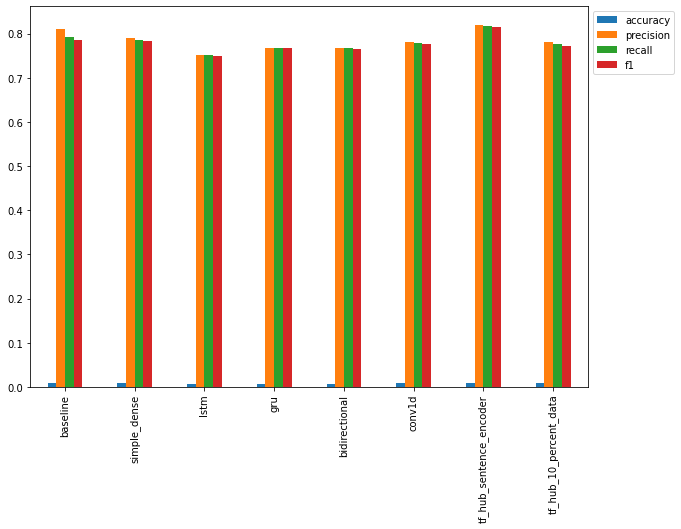

In [275]:
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

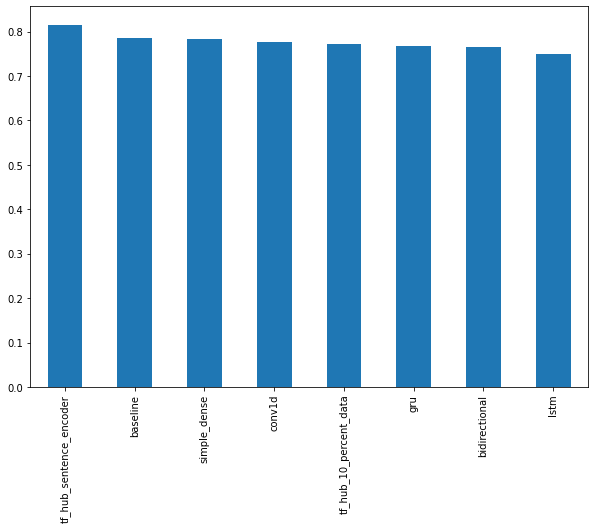

In [276]:
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));